In [31]:
from music21 import *
from IPython.display import Image


def music(info: list, notes: str, midi=False):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    elif info[0] == "None":
        part.append(clef.NoClef())
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))

    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length in ["0.3", ".3"]:
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                elif note_name in ["slash", "s"]:
                    add_n = note.Unpitched()
                    add_n.notehead = "slash"
                    add_n.stemDirection = "noStem"
                    add_n.volume.velocity = 0
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col

            part.append(add_n)

    s.append(tempo.MetronomeMark(number=120))
    s.append(part)
    if midi:
        beat_no = 0
        for thing in s.parts[0]:
            if isinstance(thing, note.Note):
                beat_no += thing.quarterLength
                if beat_no % 1 == 0:
                    print(thing)
        return s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note G>


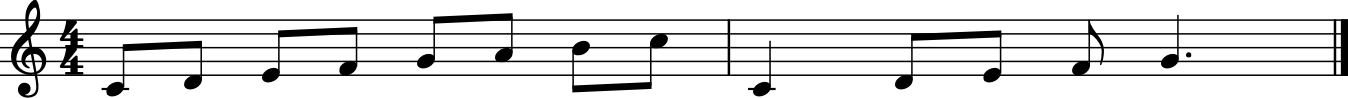

In [32]:
info = ["Treble", 0, "4/4"]
notes = "c4/.5 d4/.5 e4/.5 f4/.5 g4/.5 a4/.5 b4/.5 c5/.5 c4/1 d4/.5 e4/.5 f4/.5 g4/1.5"
music(info, notes, True)
music(info, notes)

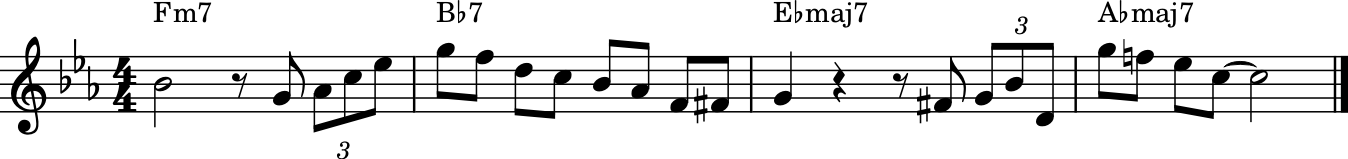

In [7]:
info = ["Treble", -3, "4/4"]
notes = "!fm7 b-4/2 r/.5 g4/.5 a-4/.3 c5/.3 e-5/.3 !b-7 g5/.5 f5/.5 d5/.5 c5/.5 b-4/.5 a-4/.5 f4/.5 f#4/.5 !e-maj7 g4/1 r/1 r/.5 f#4/.5 g4/.3 b-4/.3 d5/.3 !a-maj7 g5/.5 f5/.5 e-5/.5 c5/.5{ c5/2}"
music(info, notes, True)
music(info, notes, False)